In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.simplefilter('ignore')

In [20]:
os.chdir('C:\\Users\\yeonjun.in\\Desktop\\연준\\캐글\\제주도\\data\\raw')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
bus = pd.read_csv('bus_bts.csv')

os.chdir('C:\\Users\\yeonjun.in\\Desktop\\연준\\캐글\\제주도\\data')
sep = pd.read_pickle('sep_move.pkl')
octo = pd.read_pickle('octo_move.pkl')

In [3]:
os.chdir('C:\\Users\\yeonjun.in\\Desktop\\연준\\캐글\\제주도\\data')
weather = pd.read_csv('weather.csv',engine='python')
weather['지점'] = np.where(weather['지점'] == 184,'jeju',
        np.where(weather['지점'] == 185,'gosan',
                np.where(weather['지점'] == 188,'seongsan','po')))

weather.columns = ['dist_name','timestamp','temper','rain']

weather['rain'] = weather['rain'].fillna(0)

In [4]:
temp = weather['timestamp'].str.slice(11,13)
weather_new = weather[temp.isin(['06','07','08','09','10','11','12'])].reset_index(drop=True)

weather_new['date'] = weather_new['timestamp'].str.slice(0,10)
weather_new['time'] = weather_new['timestamp'].str.slice(11,13)

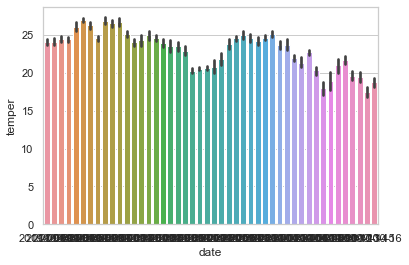

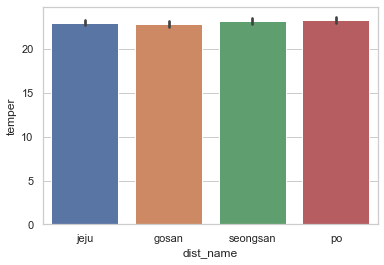

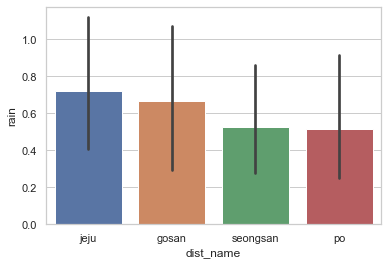

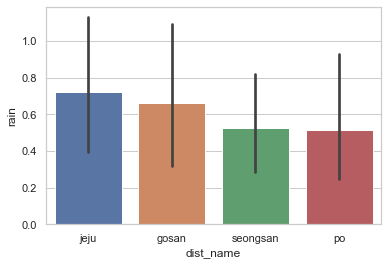

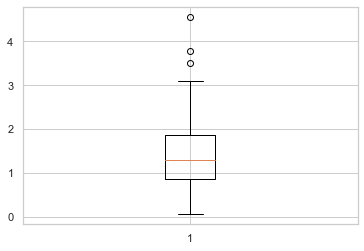

In [5]:
temp =weather_new.groupby(['dist_name','date'])['temper'].agg(['mean','std','max','min']).reset_index()

sns.barplot(x=weather_new['date'],y=weather_new['temper'])
plt.show()

sns.barplot(x=weather_new['dist_name'],y=weather_new['temper'])
plt.show()

sns.barplot(x=weather_new['dist_name'],y=weather_new['rain'])
plt.show()

sns.barplot(x=weather_new['dist_name'],y=weather_new['rain'])
plt.show()

plt.boxplot(temp['std'])
plt.show()

In [7]:
rain_data = weather_new.groupby(['date','dist_name'])['rain'].agg(['sum','std','min','max']).reset_index()
temper_data = weather_new.groupby(['date','dist_name'])['temper'].agg(['mean','std','min','max']).reset_index()

In [8]:
rain_data.to_csv('rain.csv',index=False)
temper_data.to_csv('temper.csv',index=False)

In [120]:
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,5,2019-09-01,4270000,시내,1648,예래입구,33.25862,126.40442,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,6,2019-09-01,4270000,시외,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0
7,7,2019-09-01,4270000,시외,1666,창천리,33.26598,126.37082,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,8,2019-09-01,4270000,시외,1726,강정농협,33.23603,126.47827,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
9,9,2019-09-01,4270000,시내,2008,서귀포항,33.23977,126.56450,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0


In [9]:
bus['geton_hm'] = bus['geton_time'].str.slice(0,5)

temp = bus[['bus_route_id','geton_date','geton_hm']].drop_duplicates().reset_index(drop=True)

temp['geton_hms'] = temp['geton_hm']+':00'
temp['geton_ymdhms'] = temp['geton_date'] + ' ' + temp['geton_hms']

temp['geton_ymdhms'] = pd.to_datetime(temp['geton_ymdhms'])

temp = temp.sort_values(by=['bus_route_id','geton_ymdhms'],ascending=True)

temp['lag'] = temp.groupby(['bus_route_id','geton_date'])['geton_ymdhms'].shift(1)

temp = temp[temp['lag'].notnull()].reset_index(drop=True)

temp['day_diff'] = temp['geton_ymdhms'] - temp['lag']
temp['day_diff'] = temp['day_diff'].dt.seconds

temp = temp.groupby('bus_route_id')['day_diff'].mean().to_dict()

In [13]:
train['new'] = train['bus_route_id'].map(temp)

In [ ]:
all = pd.concat([train,test],axis=0).reset_index(drop=True)

temp2 = all.groupby('bus_route_id')['station_code'].nunique().to_dict()
all['numofstation_byroute'] = all['bus_route_id'].map(temp2)

for col in ['ride_6_12','takeoff_6_12']:

    temp = all.groupby(['date','bus_route_id'])[col].sum().reset_index()
    temp = temp.groupby('bus_route_id')[col].mean().reset_index().rename(columns = {col : 'daily_mean_'+col+'_byroute'})
    
    all = pd.merge(all,temp,how='left',on='bus_route_id').reset_index(drop=True)
    all[col+'proportion_byroute'] = all['daily_mean_'+col+'_byroute']/all['numofstation_byroute']
    
    train = all.loc[:(train.shape[0]-1),]
    test = all.loc[train.shape[0]:,].drop('ride_18_20',axis=1).reset_index(drop=True)
    

added += [a for a in train.columns if 'byroute' in a]

del all

In [36]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
train['in_out'] = train['in_out'].map({'시외' : 'out', '시내' : 'in'})
test['in_out'] = test['in_out'].map({'시외' : 'out', '시내' : 'in'})

In [121]:
train.columns  = ['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
 'latitude', 'longitude', 'ride_6_7', 'ride_7_8', 'ride_8_9',
 'ride_9_10', 'ride_10_11', 'ride_11_12', 'takeoff_6_7', 'takeoff_7_8',
 'takeoff_8_9', 'takeoff_9_10', 'takeoff_10_11', 'takeoff_11_12',
 'ride_18_20']
test.columns = ['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
 'latitude', 'longitude', 'ride_6_7', 'ride_7_8', 'ride_8_9',
 'ride_9_10', 'ride_10_11', 'ride_11_12', 'takeoff_6_7', 'takeoff_7_8',
 'takeoff_8_9', 'takeoff_9_10', 'takeoff_10_11', 'takeoff_11_12'] 

In [122]:
ride_time = ['ride_6_7', 'ride_7_8', 'ride_8_9','ride_9_10', 'ride_10_11', 'ride_11_12']
tkoff_time = ['takeoff_6_7', 'takeoff_7_8','takeoff_8_9', 'takeoff_9_10', 'takeoff_10_11', 'takeoff_11_12']
target = ['ride_18_20']

In [123]:
all = pd.concat([train,test],axis=0).reset_index(drop=True)

In [124]:
train['ride_6_12'] = train[['ride_6_7','ride_7_8','ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

In [142]:
train['date'] = train['date'].astype('str')

In [148]:
r3mean = train[['date','bus_route_id','station_code','ride_6_12']].sort_values(['bus_route_id','station_code','date']).groupby(['bus_route_id','station_code'])['ride_6_12'].rolling(3).mean().reset_index()[['bus_route_id','station_code','ride_6_12']]

In [149]:
r3mean['date'] = train[['date','bus_route_id','station_code']].sort_values(['bus_route_id','station_code','date']).reset_index(drop=True)['date']

In [155]:
train = pd.merge(train,r3mean.rename(columns = {'ride_6_12' : 'rmean_ride_6_12'}),how='left',on=['bus_route_id','station_code','date'])

In [159]:
train[['rmean_ride_6_12','ride_18_20']].corr()

,rmean_ride_6_12,ride_18_20
rmean_ride_6_12,1.000000,0.616495
ride_18_20,0.616495,1.000000


In [35]:
train['ride_6_8'] = train[['ride_6_7','ride_7_8']].sum(axis=1)
train['ride_6_9'] = train[['ride_6_7','ride_7_8','ride_8_9']].sum(axis=1)
train['ride_6_10'] = train[['ride_6_7','ride_7_8','ride_8_9','ride_9_10']].sum(axis=1)
train['ride_6_11'] = train[['ride_6_7','ride_7_8','ride_8_9','ride_9_10','ride_10_11']].sum(axis=1)
train['ride_6_12'] = train[['ride_6_7','ride_7_8','ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

train['ride_7_9'] = train[['ride_7_8','ride_8_9']].sum(axis=1)
train['ride_7_10'] = train[['ride_7_8','ride_8_9','ride_9_10']].sum(axis=1)
train['ride_7_11'] = train[['ride_7_8','ride_8_9','ride_9_10','ride_10_11']].sum(axis=1)
train['ride_7_12'] = train[['ride_7_8','ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

train['ride_8_10'] = train[['ride_8_9','ride_9_10']].sum(axis=1)
train['ride_8_11'] = train[['ride_8_9','ride_9_10','ride_10_11']].sum(axis=1)
train['ride_8_12'] = train[['ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

train['ride_9_11'] = train[['ride_9_10','ride_10_11']].sum(axis=1)
train['ride_9_12'] = train[['ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

train['ride_10_12'] = train[['ride_10_11','ride_11_12']].sum(axis=1)

train['takeoff_6_8'] = train[['takeoff_6_7','takeoff_7_8']].sum(axis=1)
train['takeoff_6_9'] = train[['takeoff_6_7','takeoff_7_8','takeoff_8_9']].sum(axis=1)
train['takeoff_6_10'] = train[['takeoff_6_7','takeoff_7_8','takeoff_8_9','takeoff_9_10']].sum(axis=1)
train['takeoff_6_11'] = train[['takeoff_6_7','takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11']].sum(axis=1)
train['takeoff_6_12'] = train[['takeoff_6_7','takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

train['takeoff_7_9'] = train[['takeoff_7_8','takeoff_8_9']].sum(axis=1)
train['takeoff_7_10'] = train[['takeoff_7_8','takeoff_8_9','takeoff_9_10']].sum(axis=1)
train['takeoff_7_11'] = train[['takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11']].sum(axis=1)
train['takeoff_7_12'] = train[['takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

train['takeoff_8_10'] = train[['takeoff_8_9','takeoff_9_10']].sum(axis=1)
train['takeoff_8_11'] = train[['takeoff_8_9','takeoff_9_10','takeoff_10_11']].sum(axis=1)
train['takeoff_8_12'] = train[['takeoff_8_9','takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

train['takeoff_9_11'] = train[['takeoff_9_10','takeoff_10_11']].sum(axis=1)
train['takeoff_9_12'] = train[['takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

train['takeoff_10_12'] = train[['takeoff_10_11','takeoff_11_12']].sum(axis=1)

In [38]:
train['diff_ride_takeoff'] = train['ride_6_12'] - train['takeoff_6_12']

In [40]:
train[['diff_ride_takeoff','ride_18_20']].corr()

,diff_ride_takeoff,ride_18_20
diff_ride_takeoff,1.000000,0.372515
ride_18_20,0.372515,1.000000


In [43]:
train['ride_over_takeoff'] = (train['ride_6_12']+0.01) / (train['takeoff_6_12']+0.01)

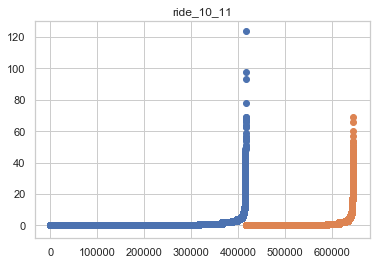

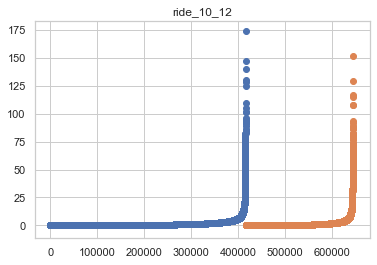

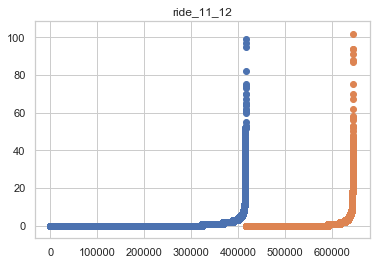

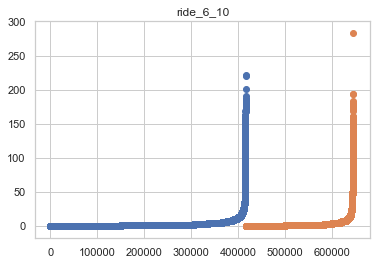

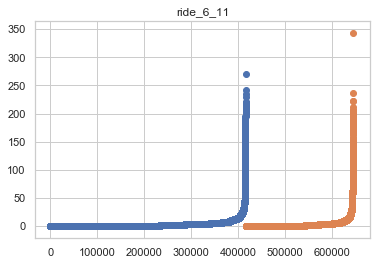

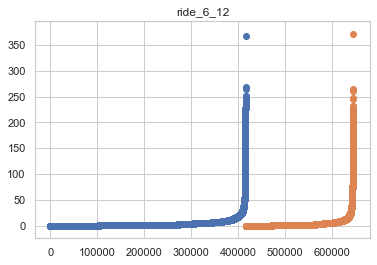

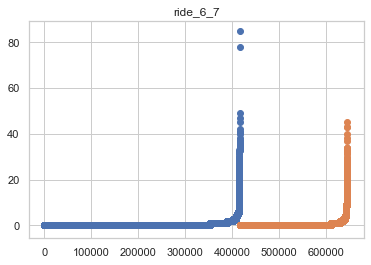

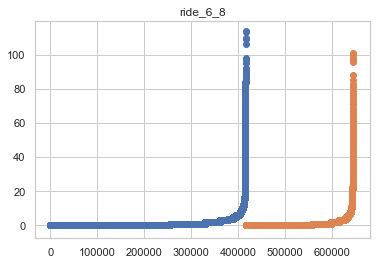

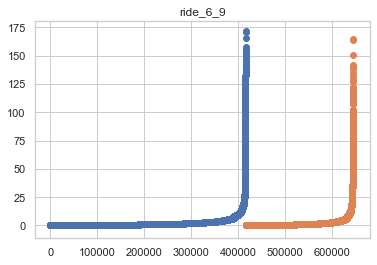

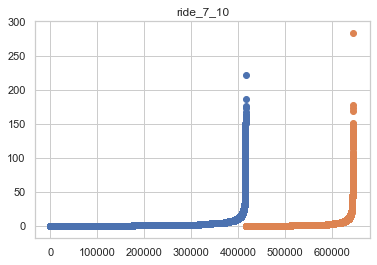

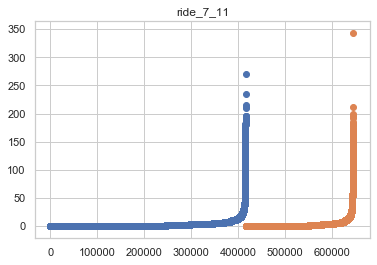

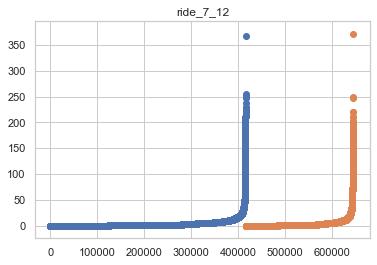

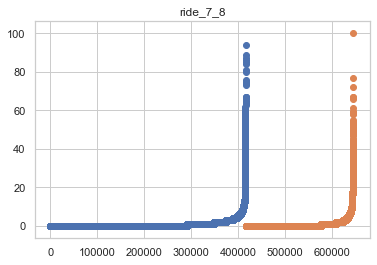

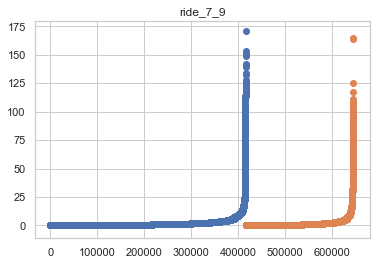

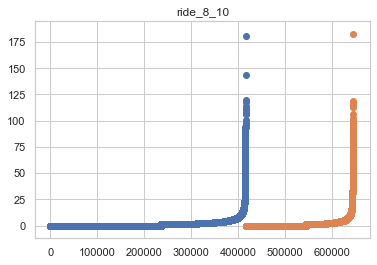

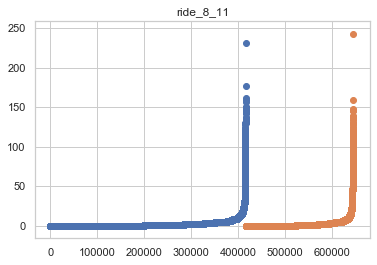

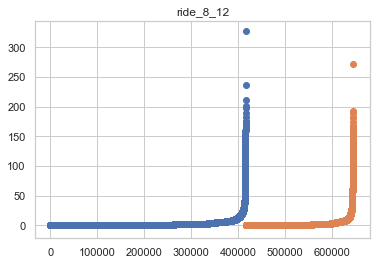

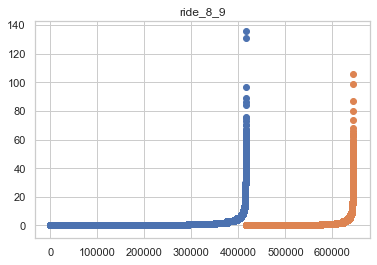

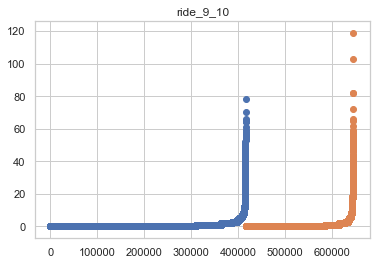

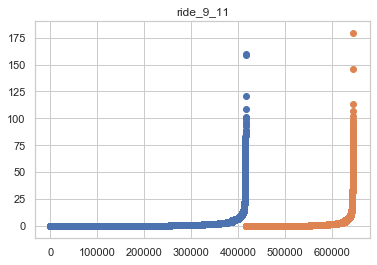

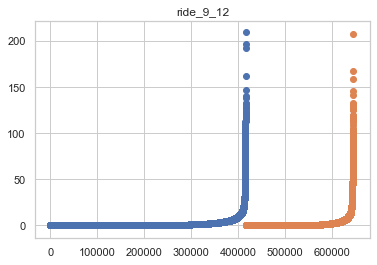

In [335]:
cols = sorted(list(set([a for a in train.columns if 'ride' in a]) - set(['ride_18_20'])))
for col in cols:
    plt.scatter(x=train['id'],y=train[col].sort_values())
    plt.scatter(x=test['id'],y=test[col].sort_values())
    plt.title(str(col))
    plt.show()

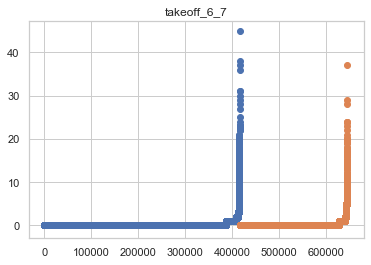

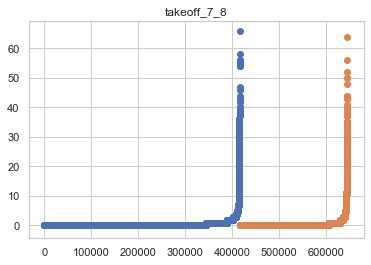

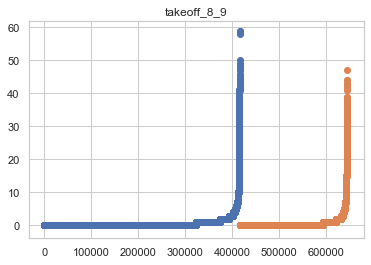

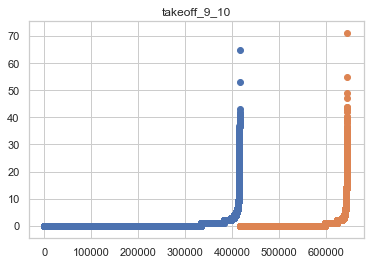

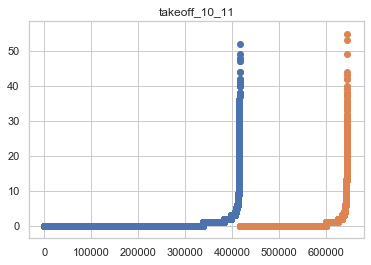

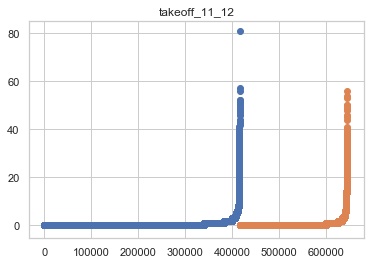

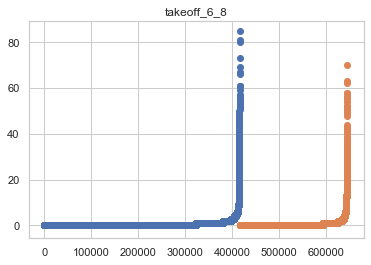

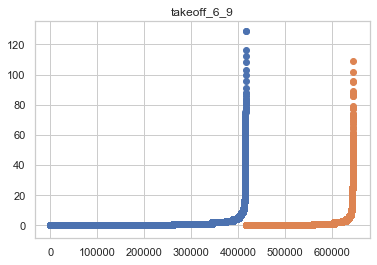

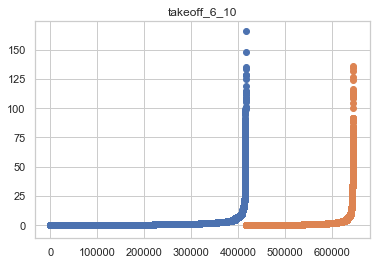

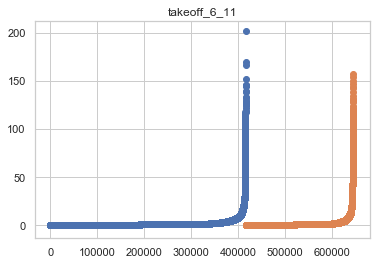

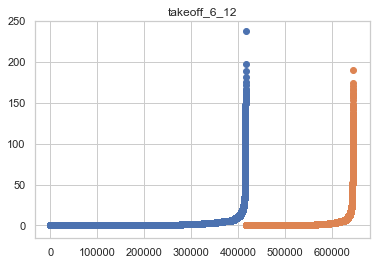

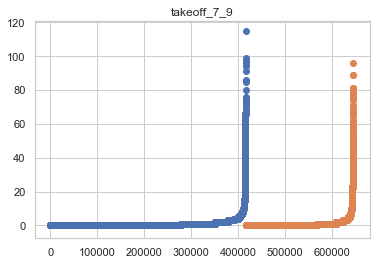

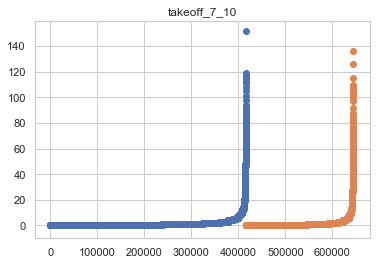

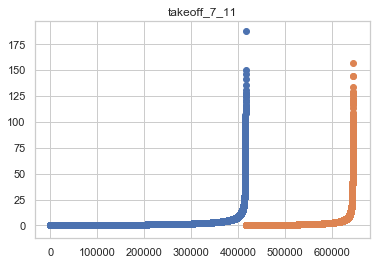

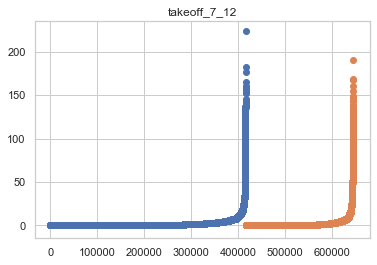

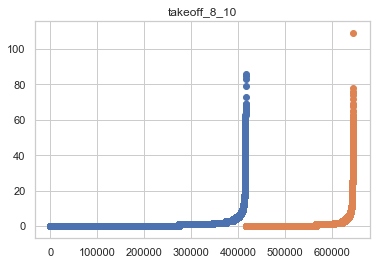

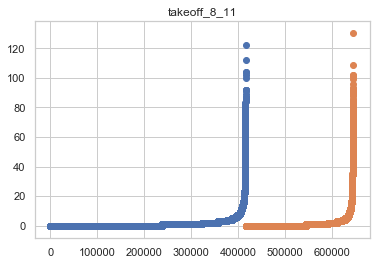

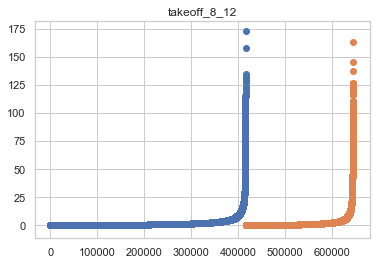

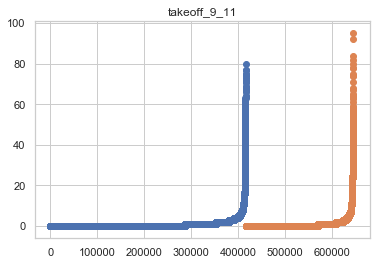

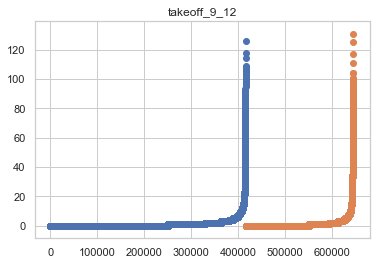

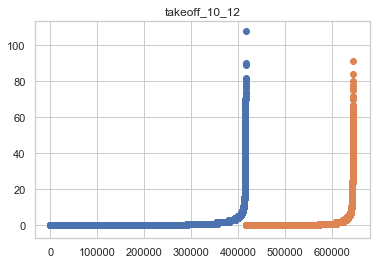

In [336]:
cols = [a for a in train.columns if 'takeoff' in a]
for col in cols:
    plt.scatter(x=train['id'],y=train[col].sort_values())
    plt.scatter(x=test['id'],y=test[col].sort_values())
    plt.title(str(col))
    plt.show()

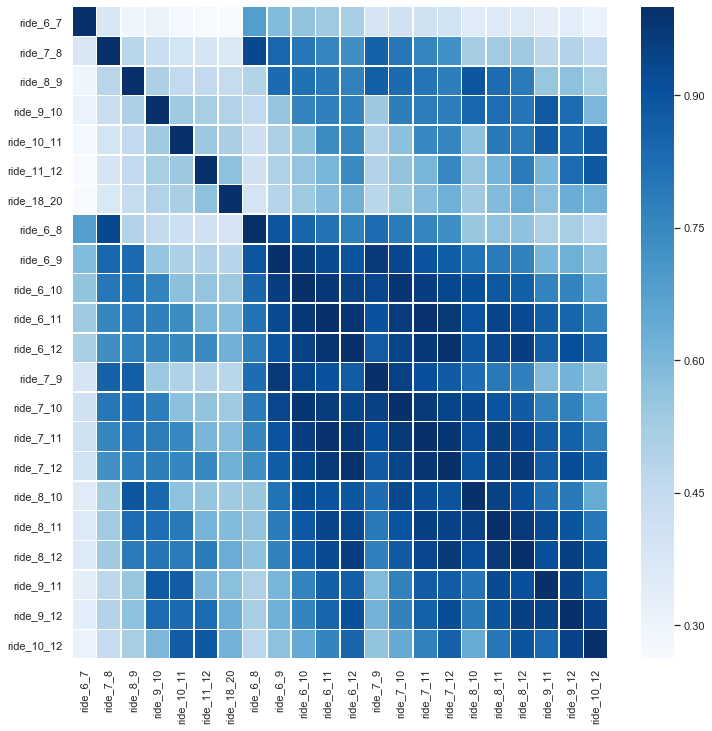

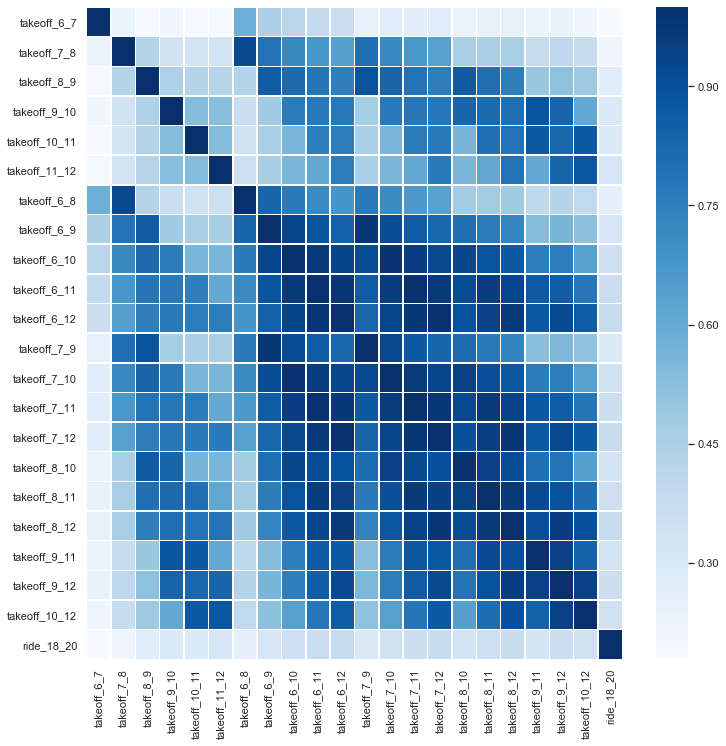

In [312]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train[[a for a in train.columns if 'ride' in a]].corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')

plt.figure(figsize=(12,12))
sns.heatmap(data = train[[a for a in train.columns if 'takeoff' in a]+['ride_18_20']].corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [296]:
test['ride_6_8'] = test[['ride_6_7','ride_7_8']].sum(axis=1)
test['ride_6_9'] = test[['ride_6_7','ride_7_8','ride_8_9']].sum(axis=1)
test['ride_6_10'] = test[['ride_6_7','ride_7_8','ride_8_9','ride_9_10']].sum(axis=1)
test['ride_6_11'] = test[['ride_6_7','ride_7_8','ride_8_9','ride_9_10','ride_10_11']].sum(axis=1)
test['ride_6_12'] = test[['ride_6_7','ride_7_8','ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

test['ride_7_9'] = test[['ride_7_8','ride_8_9']].sum(axis=1)
test['ride_7_10'] = test[['ride_7_8','ride_8_9','ride_9_10']].sum(axis=1)
test['ride_7_11'] = test[['ride_7_8','ride_8_9','ride_9_10','ride_10_11']].sum(axis=1)
test['ride_7_12'] = test[['ride_7_8','ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

test['ride_8_10'] = test[['ride_8_9','ride_9_10']].sum(axis=1)
test['ride_8_11'] = test[['ride_8_9','ride_9_10','ride_10_11']].sum(axis=1)
test['ride_8_12'] = test[['ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

test['ride_9_11'] = test[['ride_9_10','ride_10_11']].sum(axis=1)
test['ride_9_12'] = test[['ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

test['ride_10_12'] = test[['ride_10_11','ride_11_12']].sum(axis=1)

test['takeoff_6_8'] = test[['takeoff_6_7','takeoff_7_8']].sum(axis=1)
test['takeoff_6_9'] = test[['takeoff_6_7','takeoff_7_8','takeoff_8_9']].sum(axis=1)
test['takeoff_6_10'] = test[['takeoff_6_7','takeoff_7_8','takeoff_8_9','takeoff_9_10']].sum(axis=1)
test['takeoff_6_11'] = test[['takeoff_6_7','takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11']].sum(axis=1)
test['takeoff_6_12'] = test[['takeoff_6_7','takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

test['takeoff_7_9'] = test[['takeoff_7_8','takeoff_8_9']].sum(axis=1)
test['takeoff_7_10'] = test[['takeoff_7_8','takeoff_8_9','takeoff_9_10']].sum(axis=1)
test['takeoff_7_11'] = test[['takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11']].sum(axis=1)
test['takeoff_7_12'] = test[['takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

test['takeoff_8_10'] = test[['takeoff_8_9','takeoff_9_10']].sum(axis=1)
test['takeoff_8_11'] = test[['takeoff_8_9','takeoff_9_10','takeoff_10_11']].sum(axis=1)
test['takeoff_8_12'] = test[['takeoff_8_9','takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

test['takeoff_9_11'] = test[['takeoff_9_10','takeoff_10_11']].sum(axis=1)
test['takeoff_9_12'] = test[['takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

test['takeoff_10_12'] = test[['takeoff_10_11','takeoff_11_12']].sum(axis=1)

### 각 변수의 분포 확인

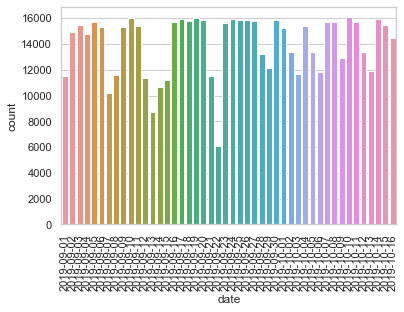

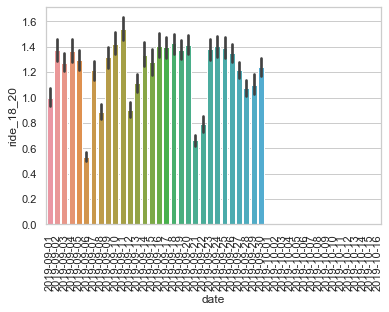

In [58]:
# 날짜의 분포 확인
# 평일과 주말은 확실하게 데이터 수가 다르다. 버스의 노선, 배차가 차이가 있다는 뜻
# 그리고 중간중간 엄청나게 내려간 곳은 추석 연휴 & 태풍
# 빨간날과 아닌닐을 구분지을 필요가 있다.
chart = sns.countplot(x="date", data=all)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

# 대체적으로 target의 편차가 크지는 않은 것으로 보임
# 
chart = sns.barplot(x='date',y='ride_18_20', data=all)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

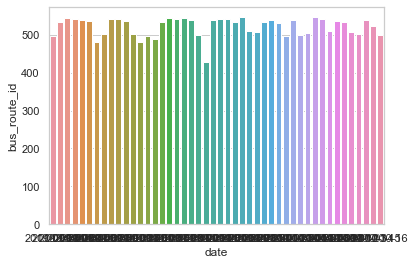

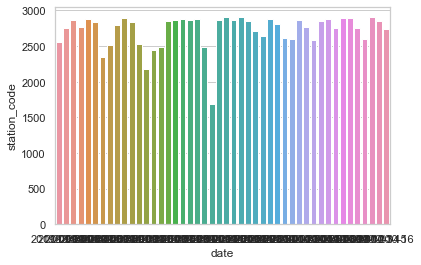

In [54]:
temp = all.groupby('date')['bus_route_id'].nunique().reset_index()
sns.barplot(x='date',y='bus_route_id',data=temp)
plt.show()

temp = all.groupby('date')['station_code'].nunique().reset_index()
sns.barplot(x='date',y='station_code',data=temp)
plt.show()

In [59]:
all['day'] = pd.to_datetime(all.date).dt.dayofweek

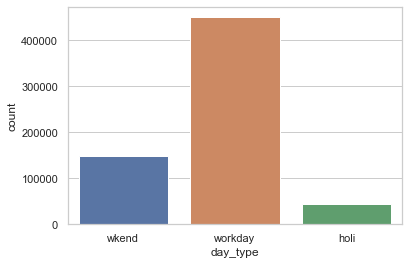

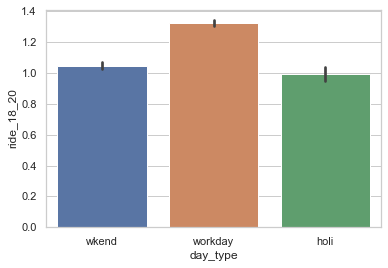

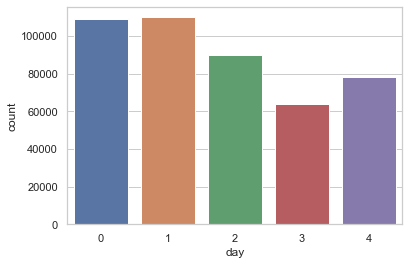

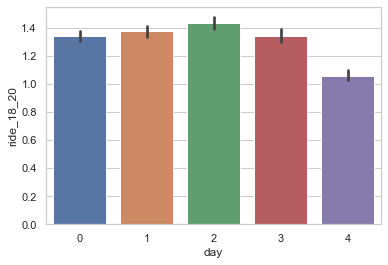

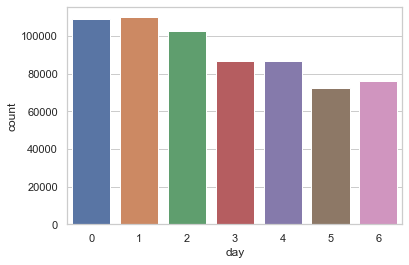

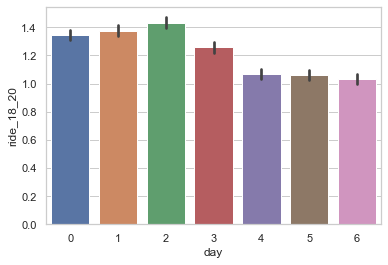

In [78]:
# 빨간날 찾기
holi = ['2019-09-12','2019-09-13','2019-09-14', '2019-10-03','2019-10-09']
wkend = ['2019-09-01','2019-09-07','2019-09-08','2019-09-14','2019-09-15',
         '2019-09-21','2019-09-22','2019-09-28','2019-09-29',
        '2019-10-05','2019-10-06','2019-10-12','2019-10-13']
workday = sorted(list(set(all.date.unique()) - set(holi+wkend)))

temp = all[['date','ride_18_20','day']]
temp['day_type'] = np.nan
temp.loc[temp.date.isin(holi),'day_type'] = 'holi'
temp.loc[temp.date.isin(wkend),'day_type'] = 'wkend'
temp.loc[temp.date.isin(workday),'day_type'] = 'workday'

# 날짜별 분포
sns.countplot(x='day_type', data=temp)
plt.show()

sns.barplot(x='day_type',y='ride_18_20', data=temp)
plt.show()

# 평일 중 요일별 분포
temp = temp[temp.day_type == 'workday']
sns.countplot(x='day', data=temp)
plt.show()

sns.barplot(x='day',y='ride_18_20', data=temp)
plt.show()


# 요일별 분포

sns.countplot(x="day", data=all)
plt.show()

sns.barplot(x='day',y='ride_18_20', data=all)
plt.show()

In [107]:
temp = train.groupby('station_code')['ride_18_20'].agg(['mean','std']).dropna().reset_index()
temp['cv'] = temp['mean']/temp['std']

print(temp[temp['mean'] > 10])
CV = temp.sort_values(by='cv',ascending=False)
# CV[CV.cv > 1]

      station_code       mean        std        cv
105            114  11.031250   6.822564  1.616877
181            201  22.217617  41.228059  0.538896
603            638  16.183533  27.793339  0.582281
996           1091  12.252101  15.041873  0.814533
1223          1355  14.263889  24.396361  0.584673
1426          1579  52.032258  22.791057  2.283012
2697          2971  11.853659  23.123993  0.512613
2699          2973  10.852273  10.794750  1.005329
2974          3290  17.827586  15.467414  1.152590
3017          3350  22.352273  15.864396  1.408958
3018          3351  35.000000  13.771747  2.541435


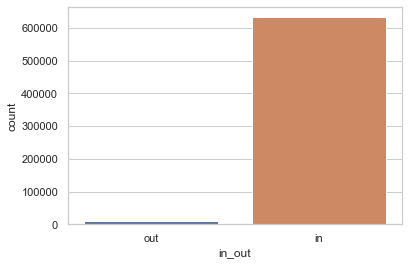

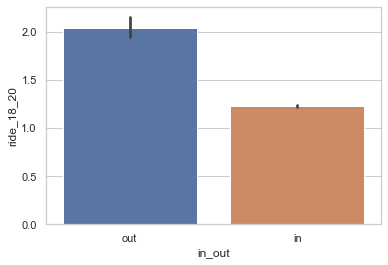

In [49]:
sns.countplot(x="in_out", data=all)
plt.show()

sns.barplot(x='in_out',y='ride_18_20', data=all)
plt.show()

### 공공데이터 유동인구랑 비교

In [338]:
move_18_20 = pd.read_pickle('move_18_20.pkl')

remove_outlier =\
move_18_20[~((move_18_20.x < 126.46) | ((move_18_20['x'] > 126.56) & (move_18_20['y'] > 33.5)))].reset_index(drop=True)

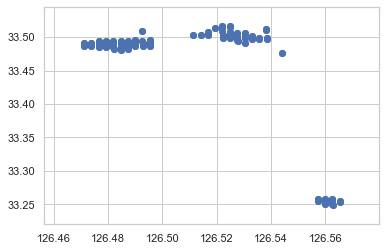

In [339]:
plt.scatter(remove_outlier.x,remove_outlier.y)

In [340]:
logic1 = ((train.latitude < 33.5) & (train.latitude > 33.47)) & ((train.longitude > 126.47) & (train.longitude < 126.50))
logic2 = ((train.latitude < 33.53) & (train.latitude > 33.48)) & ((train.longitude > 126.51) & (train.longitude < 126.54))
logic3 = ((train.latitude < 33.26) & (train.latitude > 33.24)) & ((train.longitude > 126.55) & (train.longitude < 126.57))

train['var1'] = np.nan
train.loc[logic1,'var1'] = '1'
train.loc[logic2,'var1'] = '2'
train.loc[logic3,'var1'] = '3'
train['var1'] = train['var1'].fillna('0')

In [341]:
logic1 = ((test.latitude < 33.5) & (test.latitude > 33.47)) & ((test.longitude > 126.47) & (test.longitude < 126.50))
logic2 = ((test.latitude < 33.53) & (test.latitude > 33.48)) & ((test.longitude > 126.51) & (test.longitude < 126.54))
logic3 = ((test.latitude < 33.26) & (test.latitude > 33.24)) & ((test.longitude > 126.55) & (test.longitude < 126.57))

test['var1'] = np.nan
test.loc[logic1,'var1'] = '1'
test.loc[logic2,'var1'] = '2'
test.loc[logic3,'var1'] = '3'
test['var1'] = test['var1'].fillna('0')

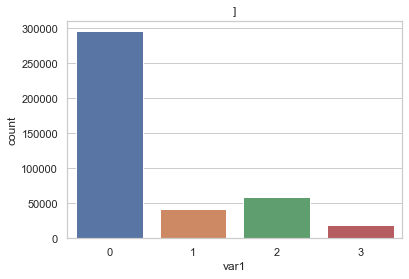

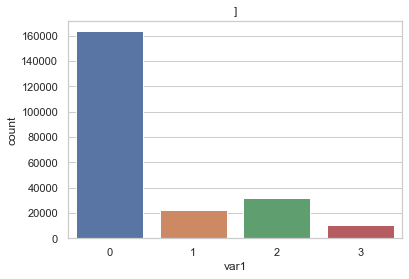

In [344]:
for db in [train,test]:
    sns.countplot(x='var1',data=db)
    plt.title(str(col))
    plt.show()

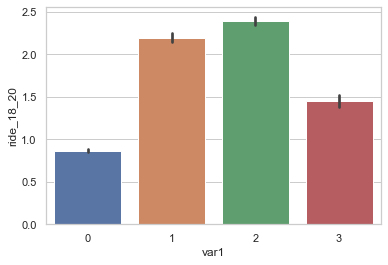

In [32]:
sns.barplot(x="var1", y = 'ride_18_20',data=train)
plt.show()

In [292]:
sep[['x','y']] = round(sep[['x','y']],1)
sep_ = sep.groupby(['x','y'])['move_18_20'].sum().reset_index().rename(columns = {'y':'latitude','x':'longitude'})
sep_.head()

,longitude,latitude,move_18_20
0,126.1,33.3,1.78
1,126.2,33.2,1327.18
2,126.2,33.3,3238.56
3,126.2,33.4,1599.12
4,126.3,33.2,4692.61


In [293]:
pd.merge(round(train[['latitude','longitude','ride_18_20']],1),sep_,on=['latitude','longitude'],how='left')[['ride_18_20','move_18_20']].corr()

,ride_18_20,move_18_20
ride_18_20,1.000000,0.134005
move_18_20,0.134005,1.000000


### 결론 : latitude 랑 longitude round 2 해서 join 하자

### 각 노선의 평균 탑승량

In [ ]:
train.groupby('')

In [143]:
train.groupby('bus_route_id')['ride_18_20'].max().shape

(613,)

In [138]:
sum(train.groupby('bus_route_id')['ride_18_20'].max() == 0)

210

In [148]:
temp = train.groupby('bus_route_id')['ride_18_20'].max().to_dict()
temp2 = train[['bus_route_id','ride_18_20']]
temp2['var'] = temp2['bus_route_id'].map(temp)

temp2[['var','ride_18_20']].corr()

,var,ride_18_20
var,1.000000,0.347691
ride_18_20,0.347691,1.000000


In [170]:
temp = train.groupby('station_name')['ride_8_9'].mean().to_dict()
temp2 = train[['station_name','ride_8_9']]
temp2['var'] = temp2['station_name'].map(temp)

temp2[['var','ride_8_9']].corr()

,var,ride_8_9
var,1.000000,0.313158
ride_8_9,0.313158,1.000000


In [162]:
temp = train.groupby('station_name')['ride_18_20'].max().to_dict()
temp2 = train[['station_name','ride_18_20']]
temp2['var'] = temp2['station_name'].map(temp)

temp2[['var','ride_18_20']].corr()

,var,ride_18_20
var,1.000000,0.322934
ride_18_20,0.322934,1.000000


In [120]:
all.groupby('bus_route_id')[ride_time].agg(['mean','std','max'])

ride_6_7                   ride_7_8                   ride_8_9  \
                  mean       std   max       mean        std   max      mean   
bus_route_id                                                                   
4270000       0.228764  0.835742  13.0   1.242220   3.463402  41.0  1.227923   
4280000       0.692737  1.299574  13.0   1.137570   1.841349  16.0  1.588687   
7990000       1.817680  1.872288   7.0   0.441989   1.175303   7.0  0.464088   
8170000       0.588991  2.108253  21.0   1.770642   3.852599  38.0  1.150459   
8180000       2.213805  3.579934  21.0   1.794613   2.841793  26.0  1.464646   
8880000       0.000000  0.000000   0.0  23.000000  14.142136  33.0  1.500000   
17010000      0.000000  0.000000   0.0   0.000000   0.000000   0.0  0.000000   
20010000      0.007168  0.084438   1.0   0.202509   0.748567   8.0  1.627240   
20020000      0.000000  0.000000   0.0   0.363636   0.504525   1.0  0.272727   
20040000      0.030303  0.246183   2.0   0.196970   0.502905   2.0  1.181818   
20050000      0.148148  0.407820   2.0   1.500000   1.538806   6.0  1.388889   
21000000      0.156013  0.490179   4.0   1.265439   2.211675  16.0  1.377031   
21010000      0.213684  0.772023   6.0   1.293684   2.506695  16.0  2.284211   
21020000      0.174274  0.542680   4.0   0.775934   1.102838   5.0  0.020747   
21040000      0.337979  0.580017   3.0   0.672474   1.175526   7.0  0.090592   
21070000      1.544194  3.076322  17.0   2.003466   2.675115  22.0  0.195841   
21080000      0.059504  0.426478   6.0   2.285950   4.359190  21.0  1.062810   
21090000      0.309589  0.716294   5.0   1.808219   2.870108  20.0  0.984932   
21100000      0.433121  1.712228  12.0   1.055732   1.899823  10.0  0.880573   
21110000      0.000000  0.000000   0.0   0.289041   0.929631   7.0  0.667123   
21120000      0.450000  0.672324   3.0   0.230000   0.547815   4.0  0.000000   
21150000      1.965739  2.985463  22.0   1.379015   1.925609  11.0  0.460385   
21160000      1.000000  1.414214   2.0   0.000000   0.000000   0.0  0.000000   
21180000      0.079592  1.046853  17.0   1.491837   2.846613  27.0  2.244898   
21200000      0.692771  0.814011   4.0   0.108434   1.101096  14.0  0.000000   
21220000      0.235195  1.465020  28.0   0.884941   3.111536  23.0  1.059222   
21230000      0.596651  1.716186  14.0   1.036530   2.059009  14.0  0.283105   
21270000      1.459144  3.208676  20.0   1.194553   2.876450  32.0  1.422179   
21290000      0.235437  1.728650  29.0   2.507282   3.517415  15.0  0.381068   
21300000      2.123318  4.210799  25.0   2.587444   4.662085  31.0  0.230942   
...                ...       ...   ...        ...        ...   ...       ...   
32460000      0.000000  0.000000   0.0   0.339768   0.799199   7.0  0.531274   
32470000      0.134826  0.549659  14.0   0.300364   1.116563  40.0  0.230088   
32480000      0.103979  0.627741   8.0   0.086008   0.367786   4.0  0.003851   
32490000      0.000000  0.000000   0.0   0.387168   0.862390   6.0  0.386431   
32500000      0.000000  0.000000   0.0   0.522979   1.140280  12.0  0.491915   
32510000      0.895161  0.992429   5.0   0.032258   0.177042   1.0  0.000000   
32520000      1.130542  1.150503   6.0   0.194581   1.693581  24.0  0.317734   
32550000      0.000000  0.000000   0.0   0.376033   0.600073   3.0  0.388430   
32560000      0.000000  0.000000   0.0   0.256410   0.545010   3.0  0.653846   
32570000      0.212984  0.610785   8.0   0.443052   1.029027   9.0  0.177677   
32580000      0.719457  0.920984   7.0   0.000000   0.000000   0.0  0.000000   
32590000      0.381194  0.751285   9.0   0.504447   1.054938   8.0  0.128335   
32610000      0.061164  0.271459   2.0   0.577008   1.148040  10.0  0.297716   
32620000      0.000000  0.000000   0.0   0.470984   0.934851   7.0  0.153911   
32630000      0.107211  0.365779   3.0   0.154649   0.448478   4.0  0.478178   
32640000      0.113208  0.369396   2.0   0.168913   0.460923   4.0  0.271339   
32660000      

In [20]:
round(all[['latitude','longitude']],2).head()

,latitude,longitude
0,33.49,126.49
1,33.49,126.49
2,33.48,126.47
3,33.51,126.49
4,33.26,126.41


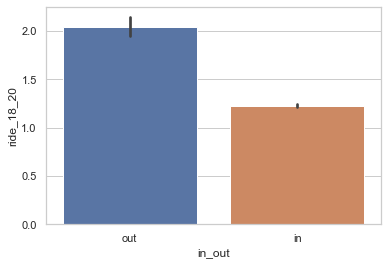

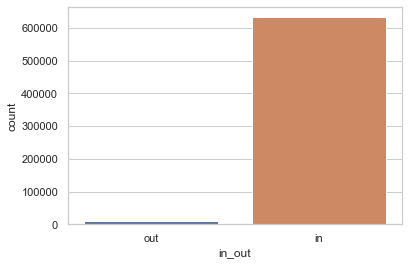

In [55]:
sns.barplot(x="in_out", y = 'ride_18_20',data=train)
plt.show()

sns.countplot(x="in_out", data=all)
plt.show()

In [58]:
all.groupby('bus_route_id')[ride_time].mean()

,ride_6_7,ride_7_8,ride_8_9,ride_9_10,ride_10_11,ride_11_12
bus_route_id,,,,,,
4270000,0.228764,1.242220,1.227923,1.387721,1.431455,1.435660
4280000,0.692737,1.137570,1.588687,1.373603,1.442737,1.436453
7990000,1.817680,0.441989,0.464088,0.480663,0.176796,0.337017
8170000,0.588991,1.770642,1.150459,0.823853,0.633028,0.559633
8180000,2.213805,1.794613,1.464646,1.547138,0.976431,0.838384
8880000,0.000000,23.000000,1.500000,0.000000,0.000000,0.000000
17010000,0.000000,0.000000,0.000000,0.842105,1.447368,1.921053
20010000,0.007168,0.202509,1.627240,1.725806,1.562724,1.005376
20020000,0.000000,0.363636,0.272727,0.454545,0.272727,0.909091


In [66]:
bts['geton_hour'] = bts.geton_time.str.slice(stop=2)

In [67]:
bts

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count,geton_hour
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1,06
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1,06
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1,07
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1,09
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1,09
5,1.019150e+15,31520000,149793453,2019-09-10,07:54:08,189,도호동,2019-09-10,08:07:09,3539.0,탐라도서관,4,1,07
6,1.019160e+15,31520000,149793453,2019-09-10,08:11:47,476,한라중학교/부영아파트,2019-09-10,08:25:42,190.0,제주중앙중학교,4,1,08
7,1.010002e+15,31520000,149793453,2019-09-10,08:25:47,190,제주중앙중학교,2019-09-10,08:33:45,74.0,보건소,1,1,08
8,1.010002e+15,31520000,149793453,2019-09-10,08:30:22,74,보건소,2019-09-10,08:33:49,74.0,보건소,1,1,08
9,1.010010e+15,31570000,149793528,2019-09-11,07:04:03,2495,동광환승정류장4(제주방면),2019-09-11,07:46:14,2970.0,제주시외버스터미널(종점),1,1,07


In [216]:
temp = train.groupby('date')['id'].count().reset_index()
holi = list(temp[temp.id < 14000].date) + ['2019-10-03','2019-10-05','2019-10-06','2019-10-09','2019-10-12','2019-10-13']

workday = train[~train.date.isin(holi)].reset_index(drop=True)
holiday = train[train.date.isin(holi)].reset_index(drop=True)

### 가설1
출근 시간에 takeoff한 곳에서 가장 가까운곳 

In [7]:
from haversine import haversine

dis = all[['station_code','latitude','longitude']].drop_duplicates().reset_index(drop=True)

'''
아 코드 너무 멍청하게 짬...
수정하자
'''

start = datetime.now()
near = []
for aa,bb in zip(dis.latitude, dis.longitude):    
    dis_ar = np.array([haversine((aa,bb),(a,b)) for a,b in zip(dis.latitude, dis.longitude)])
    temp = np.where(dis_ar == 0,100.0,dis_ar)
    near += [dis.loc[np.argmin(temp),'station_code']]
    
end = datetime.now()
print(end - start)

dis['near_station_code'] = near

0:00:31.990440


In [18]:
train['ride_7_10'] = train[['ride_7_8','ride_8_9','ride_9_10']].sum(axis=1)
train['ride_10_12'] = train[['ride_10_11','ride_11_12']].sum(axis=1)
train['ride_7_12'] = train[['ride_7_8','ride_8_9','ride_9_10','ride_10_11','ride_11_12']].sum(axis=1)

train['takeoff_7_10'] = train[['takeoff_7_8','takeoff_8_9','takeoff_9_10']].sum(axis=1)
train['takeoff_10_12'] = train[['takeoff_10_11','takeoff_11_12']].sum(axis=1)
train['takeoff_7_12'] = train[['takeoff_7_8','takeoff_8_9','takeoff_9_10','takeoff_10_11','takeoff_11_12']].sum(axis=1)

In [27]:
temp = pd.merge(dis,
         train.groupby('station_code')['takeoff_7_12'].mean().reset_index().\
         rename(columns={'station_code' : 'near_station_code'}),how='left',on='near_station_code')[['station_code','takeoff_7_12']]

In [28]:
pd.merge(train,temp,how='left',on='station_code')[['takeoff_7_12_y','ride_18_20']].corr()

,takeoff_7_12_y,ride_18_20
takeoff_7_12_y,1.000000,0.234749
ride_18_20,0.234749,1.000000


### 망함 ㅠ

In [34]:
train['ride_6_12']

KeyError: 'ride_6_12'

In [178]:
train[ride_time+target].corr()

,ride_6_7,ride_7_8,ride_8_9,ride_9_10,ride_10_11,ride_11_12,ride_18_20
ride_6_7,1.000000,0.375844,0.296554,0.313622,0.279269,0.265106,0.262173
ride_7_8,0.375844,1.000000,0.479535,0.427030,0.395135,0.389945,0.371751
ride_8_9,0.296554,0.479535,1.000000,0.506296,0.458034,0.453017,0.445316
ride_9_10,0.313622,0.427030,0.506296,1.000000,0.537374,0.517800,0.494085
ride_10_11,0.279269,0.395135,0.458034,0.537374,1.000000,0.542494,0.512666
ride_11_12,0.265106,0.389945,0.453017,0.517800,0.542494,1.000000,0.569747
ride_18_20,0.262173,0.371751,0.445316,0.494085,0.512666,0.569747,1.000000


### 노선 DB 만들어볼까

In [225]:
temp = pd.DataFrame(workday[['date','station_code']])
temp['takeoff_7_10'] = tuple(workday[['takeoff_7_8','takeoff_8_9', 'takeoff_9_10']].sum(axis=1))

aa = temp.groupby(['date','station_code'])['takeoff_7_10'].sum().reset_index()
aaa = pd.merge(aa,dis[['station_code','near_station_code']],how='inner',on = ['station_code'])

In [228]:
target_df = workday[['date','station_code']+target].groupby(['date','station_code'])['ride_18_20'].sum().reset_index()

aaaa = aaa[['date','near_station_code','takeoff_7_10']].rename(columns = {
    'near_station_code' : 'station_code'})

result = pd.merge(target_df,aaaa,how='inner',on=['date','station_code'])

result[['ride_18_20','takeoff_7_10']].corr(method='pearson')

# plt.scatter(result.takeoff_7_10,result.ride_18_20)

,ride_18_20,takeoff_7_10
ride_18_20,1.000000,0.676434
takeoff_7_10,0.676434,1.000000


### 애초에 타는 사람이 아주 적은 station_code는 굳이 bus_route_id로 나눠서 안해도 되지 않을까

In [229]:
test

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride_6_7,ride_7_8,ride_8_9,ride_9_10,ride_10_11,ride_11_12,takeoff_6_7,takeoff_7_8,takeoff_8_9,takeoff_9_10,takeoff_10_11,takeoff_11_12
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,415428,2019-10-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,415429,2019-10-01,4270000,시내,1648,예래입구,33.25862,126.40442,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,415430,2019-10-01,4270000,시외,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,2.0,0.0,1.0
8,415431,2019-10-01,4270000,시외,1662,씨에스호텔,33.24362,126.42032,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,415432,2019-10-01,4270000,시외,1666,창천리,33.26598,126.37082,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [216]:
# plt.figure(1)
# plt.scatter(train.latitude,train.longitude)
# plt.show()

# plt.figure(2)
# plt.scatter(workday.latitude,workday.longitude)
# plt.show()

# plt.figure(3)
# plt.scatter(weekend.latitude,weekend.longitude)
# plt.show()


In [55]:
all.head()

,bus_route_id,date,id,in_out,latitude,longitude,ride_10_11,ride_11_12,ride_18_20,ride_6_7,...,ride_9_10,station_code,station_name,takeoff_10_11,takeoff_11_12,takeoff_6_7,takeoff_7_8,takeoff_8_9,takeoff_9_10,day
0,4270000,2019-09-01,0,시외,33.48990,126.49373,2.0,6.0,0.0,0.0,...,5.0,344,제주썬호텔,0.0,0.0,0.0,0.0,0.0,0.0,6
1,4270000,2019-09-01,1,시외,33.48944,126.48508,5.0,6.0,5.0,1.0,...,2.0,357,한라병원,0.0,0.0,0.0,0.0,0.0,0.0,6
2,4270000,2019-09-01,2,시외,33.48181,126.47352,0.0,0.0,2.0,1.0,...,2.0,432,정존마을,0.0,0.0,0.0,0.0,0.0,0.0,6
3,4270000,2019-09-01,3,시내,33.50577,126.49252,14.0,16.0,53.0,0.0,...,26.0,1579,제주국제공항(600번),0.0,0.0,0.0,0.0,0.0,0.0,6
4,4270000,2019-09-01,4,시내,33.25579,126.41260,0.0,0.0,0.0,0.0,...,0.0,1646,중문관광단지입구,0.0,0.0,0.0,0.0,0.0,1.0,6


In [62]:
all.groupby(['bus_route_id','station_name'])['station_code'].nunique().reset_index().sort_values(by='station_code',ascending=False)

,bus_route_id,station_name,station_code
24443,31700000,신시가지,5
1872,22250000,성읍1리,4
8127,24310000,원노형,4
8071,24300000,원노형,4
10693,27250000,성읍1리,4
22330,31000000,신안동,4
9637,26180000,동홍동청소년문화의집,4
9452,26110000,앞동산,3
11587,27670000,산양리,3
12077,27970000,금악리,3


In [64]:
all[all.station_name == '신시가지'].station_code.unique()

array([1675, 1693, 1692, 1691, 1690], dtype=int64)

In [22]:
station_info = train.groupby('station_name')['station_code'].agg(['max','min']).reset_index().\
rename(columns = {'max' : 'code1',
                  'min' : 'code2'})

In [32]:
bts['geton_timestamp'] = bts.geton_date+' '+bts.geton_time
bts['getoff_timestamp'] = bts.getoff_date+' '+bts.getoff_time

In [33]:
bts.geton_timestamp = pd.to_datetime(bts.geton_timestamp)
bts.getoff_timestamp = pd.to_datetime(bts.getoff_timestamp)

In [34]:
bts['week_day'] =  pd.to_datetime(bts['geton_date']).dt.dayofweek

In [36]:
bts['onboarding'] = bts['getoff_timestamp'] - bts['geton_timestamp']

In [42]:
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count,geton_timestamp,getoff_timestamp,week_day,onboarding
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1,2019-09-10 06:34:45,2019-09-10 07:10:31,1,00:35:46
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1,2019-09-10 06:34:58,2019-09-10 06:56:27,1,00:21:29
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1,2019-09-10 07:19:07,2019-09-10 07:40:29,1,00:21:22
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1,2019-09-09 09:14:47,2019-09-09 10:02:46,0,00:47:59
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1,2019-09-09 09:28:53,2019-09-09 10:21:37,0,00:52:44


### 어디서 타면 어디서 많이 내릴까?

In [74]:
ride = ['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride']

In [75]:
for a in range(1,6):
    temp = train[ride[:(a+1)]].sum(axis=1)
    temp = temp.to_dict()
    colname = str(a)+'_hour_ride'
    train[colname] = train['id'].map(temp)

In [78]:
train[ride].head()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride
0,0.0,1.0,2.0,5.0,2.0,6.0
1,1.0,4.0,4.0,2.0,5.0,6.0
2,1.0,1.0,0.0,2.0,0.0,0.0
3,0.0,17.0,6.0,26.0,14.0,16.0
4,0.0,0.0,0.0,0.0,0.0,0.0


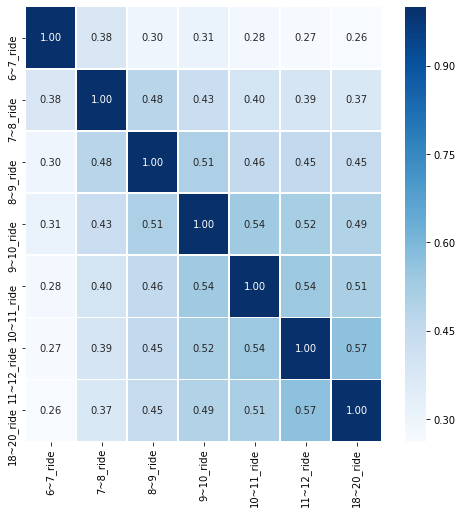

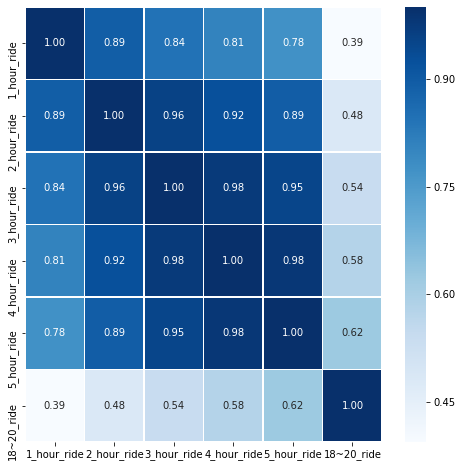

In [89]:
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(8,8))
sns.heatmap(data = train[ride + ['18~20_ride']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

plt.figure(figsize=(8,8))
sns.heatmap(data = train[[a for a in train.columns if '_hour_' in a]+['18~20_ride']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 내가 내린 곳 반대편에서 탄다.

In [95]:
train.groupby(['station_name','station_code'])['id'].count().reset_index()

,station_name,station_code,id
0,(구)구판장,4211,33
1,(구)구판장,4212,10
2,(구)중문동주민센터,2058,263
3,(구)중문동주민센터,2059,299
4,(구)중앙파출소,1952,280
5,(구)중앙파출소,2080,177
6,(구)중앙파출소,2696,76
7,(구)화산초등학교,2146,6
8,(구)화산초등학교,4210,18
9,1100고지휴게소,1245,18


In [90]:
bts

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1
5,1.019150e+15,31520000,149793453,2019-09-10,07:54:08,189,도호동,2019-09-10,08:07:09,3539.0,탐라도서관,4,1
6,1.019160e+15,31520000,149793453,2019-09-10,08:11:47,476,한라중학교/부영아파트,2019-09-10,08:25:42,190.0,제주중앙중학교,4,1
7,1.010002e+15,31520000,149793453,2019-09-10,08:25:47,190,제주중앙중학교,2019-09-10,08:33:45,74.0,보건소,1,1
8,1.010002e+15,31520000,149793453,2019-09-10,08:30:22,74,보건소,2019-09-10,08:33:49,74.0,보건소,1,1
9,1.010010e+15,31570000,149793528,2019-09-11,07:04:03,2495,동광환승정류장4(제주방면),2019-09-11,07:46:14,2970.0,제주시외버스터미널(종점),1,1


In [106]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,1_hour_ride,2_hour_ride,3_hour_ride,4_hour_ride,5_hour_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,8.0,10.0,16.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,0.0,5.0,5.0,9.0,11.0,16.0,22.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,4.0,4.0,4.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,0.0,53.0,17.0,23.0,49.0,63.0,79.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
aa = train.groupby('station_name')['station_code'].nunique().reset_index().sort_values(by='station_code')
aa.head()

,station_name,station_code
1960,히귀반석,1
1501,제주자동차검사소,1
1498,제주은행,1
588,보목신협,1
589,보목신협앞,1


In [144]:
aa[aa.station_code > 2].station_name.head()

1048         신흥동
505          명월리
1446     제주대학교병원
2       (구)중앙파출소
1171       오등동입구
Name: station_name, dtype: object

In [145]:
train[train.station_name == '신흥동']

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,1_hour_ride,2_hour_ride,3_hour_ride,4_hour_ride,5_hour_ride
7415,7415,2019-09-01,28710000,시내,867,신흥동,33.34061,126.18206,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7574,7574,2019-09-01,28720000,시내,1156,신흥동,33.34063,126.18238,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
7785,7785,2019-09-01,28840000,시내,1156,신흥동,33.34063,126.18238,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7827,7827,2019-09-01,28860000,시내,1156,신흥동,33.34063,126.18238,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
11531,11531,2019-09-01,32740000,시내,1156,신흥동,33.34063,126.18238,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
20317,20317,2019-09-02,28690000,시내,867,신흥동,33.34061,126.18206,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0
20500,20500,2019-09-02,28700000,시내,1156,신흥동,33.34063,126.18238,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
20594,20594,2019-09-02,28710000,시내,867,신흥동,33.34061,126.18206,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
20770,20770,2019-09-02,28720000,시내,1156,신흥동,33.34063,126.18238,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35564,35564,2019-09-03,28690000,시내,867,신흥동,33.34061,126.18206,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [163]:
train[]

118895

In [153]:
train[target].describe()

count    415423.000000
mean          1.242095
std           4.722287
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         272.000000
Name: 18~20_ride, dtype: float64

In [142]:
temp = train['18~20_ride']
temp.index = train['station_name']
temp = temp.to_dict()
aa[aa.station_code > 2].station_name.reset_index(drop=True).map(temp)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      1.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     1.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     4.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0
91     0.0
92     0.0
93     0.0
94     0.0
95     0.0
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
101    0.0
102    0.0
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
108    0.0
109    0.0
110    0.0
111    0.0
112    0.0
Name: station_name, Length: 113, dtype: float64

In [109]:
train.groupby(['station_name','station_code'])['id'].count().reset_index()

,station_name,station_code,id
0,(구)구판장,4211,33
1,(구)구판장,4212,10
2,(구)중문동주민센터,2058,263
3,(구)중문동주민센터,2059,299
4,(구)중앙파출소,1952,280
5,(구)중앙파출소,2080,177
6,(구)중앙파출소,2696,76
7,(구)화산초등학교,2146,6
8,(구)화산초등학교,4210,18
9,1100고지휴게소,1245,18


In [104]:
temp = train['7~8_takeoff'] + train['8~9_takeoff'] + train['9~10_takeoff']
pd.concat([temp,train['18~20_ride']],axis=1).corr()

,0,18~20_ride
0,1.000000,0.350773
18~20_ride,0.350773,1.000000


### 아침마다 반복적으로 나타나는 곳 -> 출근

In [223]:
# bts.getoff_time.str.slice(stop=2)

In [221]:
bts[bts.user_card_id == 1010010127894129.0]

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
13943,1.010010e+15,23000000,149793673,2019-09-11,06:32:23,360,노형오거리,2019-09-11,07:12:57,592.0,화북초등학교,1,1
76359,1.010010e+15,23000000,149793684,2019-09-16,06:32:19,360,노형오거리,2019-09-16,07:15:08,592.0,화북초등학교,1,1
139006,1.010010e+15,23000000,149793651,2019-09-18,06:32:25,360,노형오거리,2019-09-18,07:10:45,592.0,화북초등학교,1,1
188510,1.010010e+15,23000000,149793693,2019-09-27,06:32:26,360,노형오거리,2019-09-27,07:13:34,592.0,화북초등학교,1,1
261966,1.010010e+15,23000000,149793679,2019-09-05,06:32:25,360,노형오거리,2019-09-05,07:12:51,592.0,화북초등학교,1,1
271006,1.010010e+15,23000000,149793680,2019-09-04,06:34:54,360,노형오거리,2019-09-04,07:10:56,592.0,화북초등학교,1,1
316149,1.010010e+15,23000000,149793682,2019-09-19,06:32:19,360,노형오거리,2019-09-19,07:10:56,592.0,화북초등학교,1,1
380796,1.010010e+15,23000000,149793682,2019-09-02,06:32:39,360,노형오거리,2019-09-02,07:10:54,592.0,화북초등학교,1,1
453856,1.010010e+15,23000000,149793678,2019-09-06,06:32:21,360,노형오거리,2019-09-06,07:14:51,592.0,화북초등학교,1,1


In [217]:
bts.groupby('user_card_id')

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1
5,1.019150e+15,31520000,149793453,2019-09-10,07:54:08,189,도호동,2019-09-10,08:07:09,3539.0,탐라도서관,4,1
6,1.019160e+15,31520000,149793453,2019-09-10,08:11:47,476,한라중학교/부영아파트,2019-09-10,08:25:42,190.0,제주중앙중학교,4,1
7,1.010002e+15,31520000,149793453,2019-09-10,08:25:47,190,제주중앙중학교,2019-09-10,08:33:45,74.0,보건소,1,1
8,1.010002e+15,31520000,149793453,2019-09-10,08:30:22,74,보건소,2019-09-10,08:33:49,74.0,보건소,1,1
9,1.010010e+15,31570000,149793528,2019-09-11,07:04:03,2495,동광환승정류장4(제주방면),2019-09-11,07:46:14,2970.0,제주시외버스터미널(종점),1,1
